# Hotel Booking Data Analysis: Uncovering Patterns for Operational Efficiency and Revenue Growth

This notebook presents an exploratory data analysis (EDA) of a Resort Hotel’s booking dataset. The goal is to uncover key patterns, trends, and relationships that can support data-driven decision-making for operational efficiency and revenue growth.

**Outline:**
1. Import Required Libraries and Load Data  
2. Data Cleaning and Preprocessing  
3. Feature Engineering and Derived Fields  
4. Univariate Analysis  
5. Bivariate and Multivariate Analysis  
6. Time-Series Analysis of Booking Trends  
7. Guest Demographics and Country Distribution  
8. Market Segment and ADR Comparison  
9. Booking Lead Time Analysis  
10. Correlation Analysis  
11. Hypothesis Testing  
12. Key Business Questions Exploration  

## 1. Import Required Libraries and Load Data

Import essential libraries and load the hotel booking dataset into a pandas DataFrame.

In [74]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# Load dataset
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 2. Data Cleaning and Preprocessing

- Handle missing values
- Remove duplicates
- Parse and standardize date columns
- Convert categorical variables
- Handle outliers

In [50]:
# --- Step 1: Handle Missing Values ---
df['children'].fillna(0, inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

df['children'] = df['children'].astype(int)
df['agent'] = df['agent'].astype(int)
df['company'] = df['company'].astype(int)

/var/folders/b1/zg8gvzyd2bs4s02k1b6464rc0000gn/T/ipykernel_34021/1227427703.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)
/var/folders/b1/zg8gvzyd2bs4s02k1b6464rc0000gn/T/ipykernel_34021/1227427703.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [22]:
# --- Step 2: Convert & Parse Date Columns ---
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Convert arrival_date_month to numeric
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['arrival_month'] = df['arrival_date_month'].map(month_map)

In [23]:
# --- Step 3: Create Derived Fields ---
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df['booking_success'] = np.where(df['is_canceled'] == 0, 1, 0)
df['room_mismatch'] = np.where(df['reserved_room_type'] != df['assigned_room_type'], 1, 0)

In [24]:
 # --- Step 4: Remove Duplicates ---
df.drop_duplicates(inplace=True)

In [25]:
# --- Step 5: Handle Outliers (Optional) ---
# For example, remove extreme ADR values (e.g., > 500)
df = df[df['adr'] <= 500]

In [26]:
# --- Final Shape & Null Check ---
print("Shape after cleaning:", df.shape)
print("\nMissing values summary:")
print(df.isnull().sum().sort_values(ascending=False))

Shape after cleaning: (87393, 37)

Missing values summary:
hotel                             0
reserved_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
arrival_month                     0
total_guests                      0
total_stay                        0
booking_success                   0
assigned_room_type                0
previous_bookings_not_canceled    0
is_canceled                       0
previous_cancellations            0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays

## 3. Feature Engineering and Derived Fields

Create new features to support analysis, such as total stay nights, total guests, and booking month.

In [4]:
# Total stay nights
df['total_stay_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Total guests
df['total_guests'] = df['adults'] + df['children'] + df['babies']

# Booking month (numeric)
df['arrival_month_num'] = pd.to_datetime(df['arrival_date_month'], format='%B').dt.month

# Was the guest upgraded?
df['was_upgraded'] = (df['reserved_room_type'].astype(str) != df['assigned_room_type'].astype(str)).astype(int)

# Is family booking?
df['is_family'] = ((df['children'] > 0) | (df['babies'] > 0)).astype(int)

# Display new columns
df[['total_stay_nights', 'total_guests', 'arrival_month_num', 'was_upgraded', 'is_family']].head()

,total_stay_nights,total_guests,arrival_month_num,was_upgraded,is_family
0,0,2.0,7,0,0
1,0,2.0,7,0,0
2,1,1.0,7,1,0
3,1,1.0,7,0,0
4,2,2.0,7,0,0


## 4. Univariate Analysis

Analyze the distribution of key variables using histograms and boxplots.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


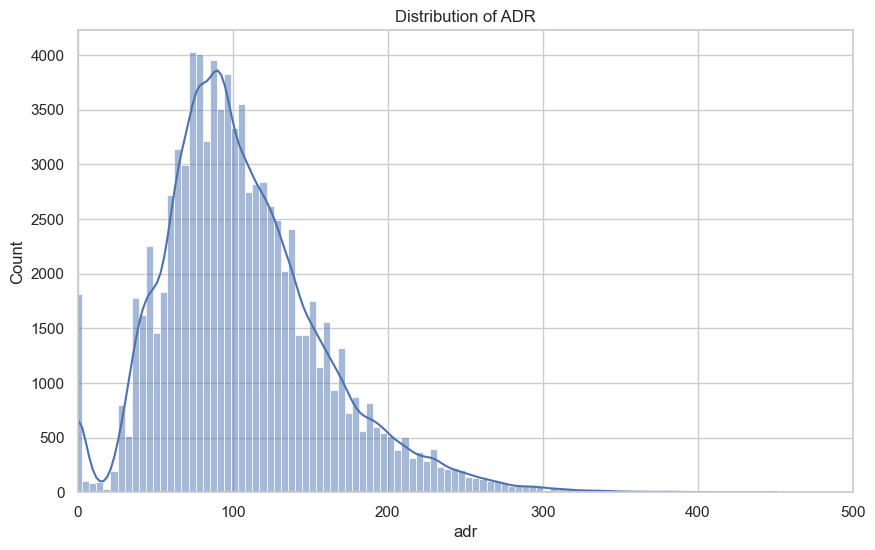

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


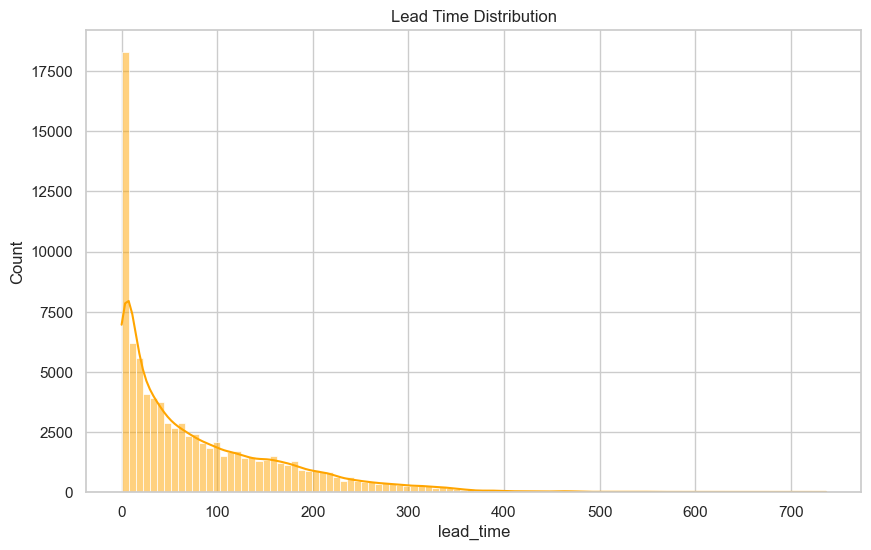

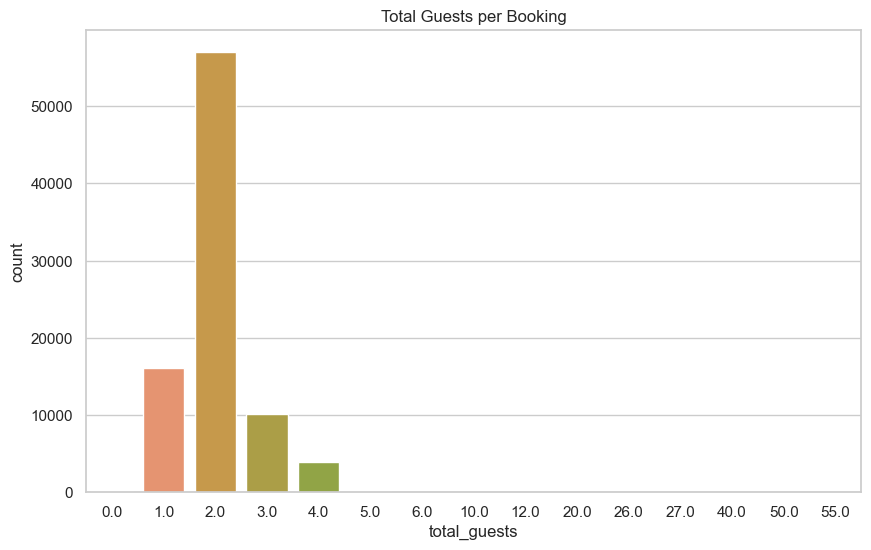

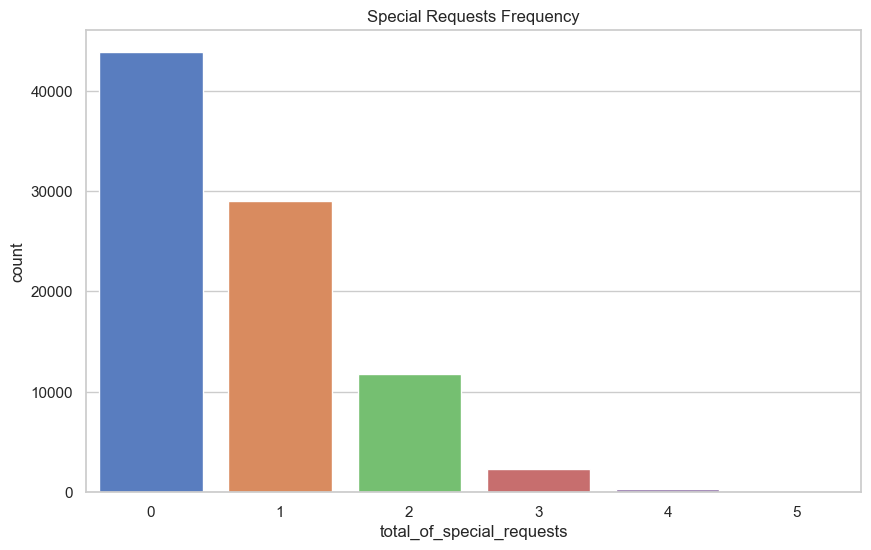

In [30]:
# 1. Distribution of ADR
plt.figure(figsize=(10, 6))
sns.histplot(df['adr'], bins=100, kde=True)
plt.title("Distribution of ADR")
plt.xlim(0, 500)
plt.show()

# 2. Lead Time
plt.figure(figsize=(10, 6))
sns.histplot(df['lead_time'], bins=100, kde=True, color='orange')
plt.title("Lead Time Distribution")
plt.show()

# 3. Total Guests
plt.figure(figsize=(10, 6))
sns.countplot(x='total_guests', data=df)
plt.title("Total Guests per Booking")
plt.show()

# 4. Special Requests
plt.figure(figsize=(10, 6))
sns.countplot(x='total_of_special_requests', data=df, palette='muted')
plt.title("Special Requests Frequency")
plt.show()


## 📈 Step 3: Time-Series Trends



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


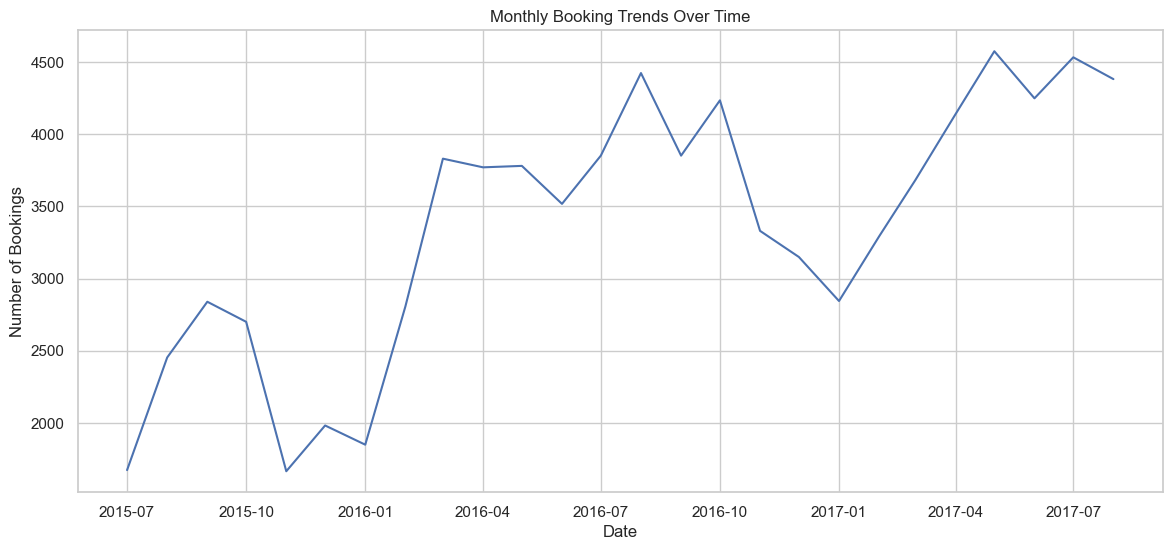

In [31]:
# Monthly Booking Trend
monthly_bookings = df.groupby(['arrival_date_year', 'arrival_month'])['booking_success'].count().reset_index()
monthly_bookings['Month'] = pd.to_datetime(dict(year=monthly_bookings['arrival_date_year'],
                                                month=monthly_bookings['arrival_month'], day=1))
monthly_bookings = monthly_bookings.sort_values('Month')

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_bookings, x='Month', y='booking_success')
plt.title('Monthly Booking Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.show()


## 5. Bivariate and Multivariate Analysis

Explore relationships between pairs or groups of variables using scatterplots, barplots, and groupby aggregations.

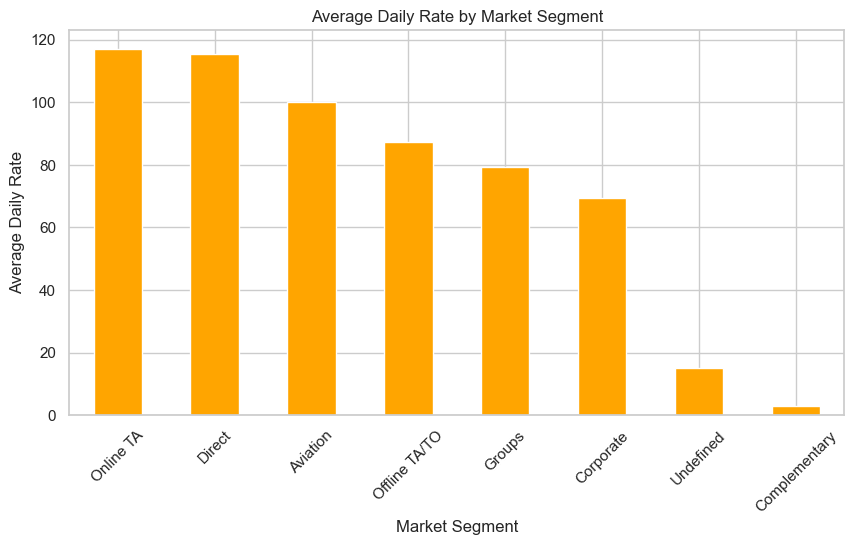

In [85]:
# ADR by Market Segment
segment_adr = df.groupby('market_segment')['adr'].mean().sort_values(ascending=False)

# Plotting the results as a bar chart to compare different segments
segment_adr.plot(kind='bar', figsize=(10, 5), color='orange')

plt.title('Average Daily Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Average Daily Rate')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

/var/folders/b1/zg8gvzyd2bs4s02k1b6464rc0000gn/T/ipykernel_34021/1413322211.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='hotel', y='adr', data=df, ci=None)


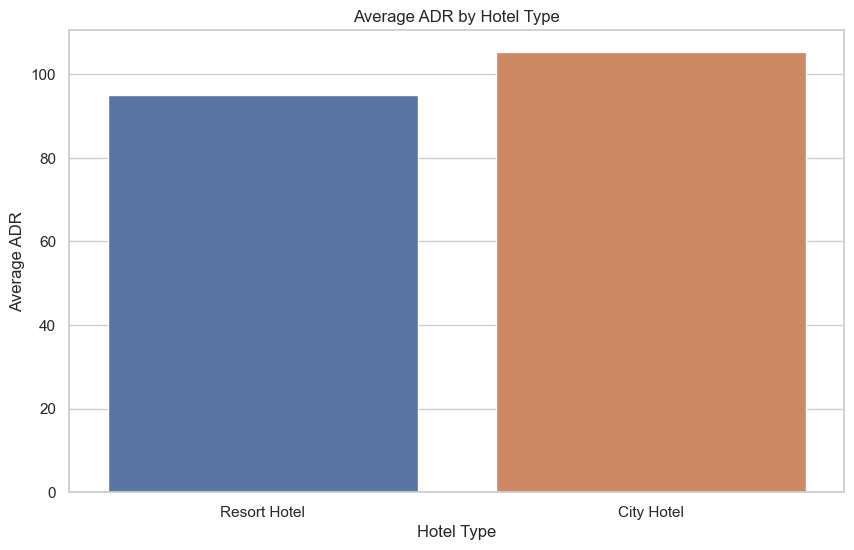

In [87]:

# Boxplot: ADR by hotel type
sns.barplot(x='hotel', y='adr', data=df, ci=None)
plt.title('Average ADR by Hotel Type')
plt.ylabel('Average ADR')
plt.xlabel('Hotel Type')
plt.show()

## 6. Time-Series Analysis of Booking Trends

Analyze booking trends over time (monthly, yearly) using line plots and time-based groupings.

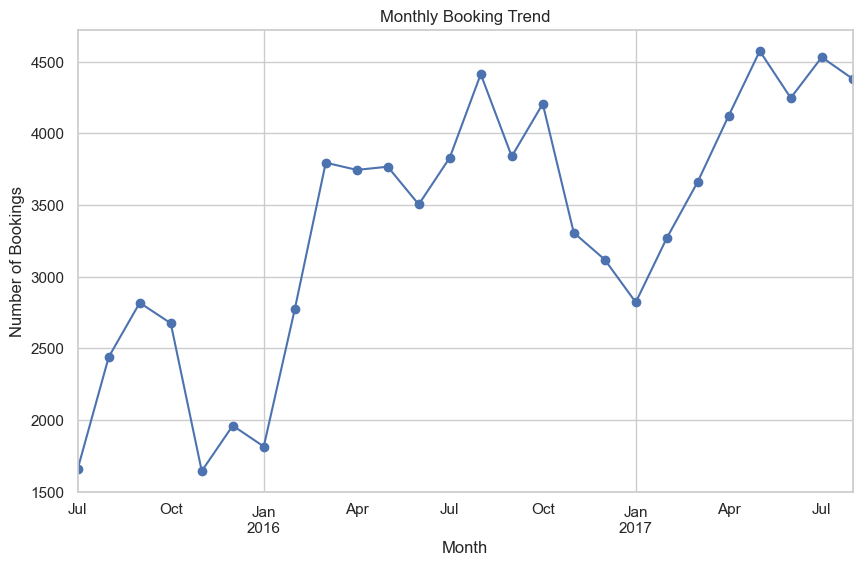

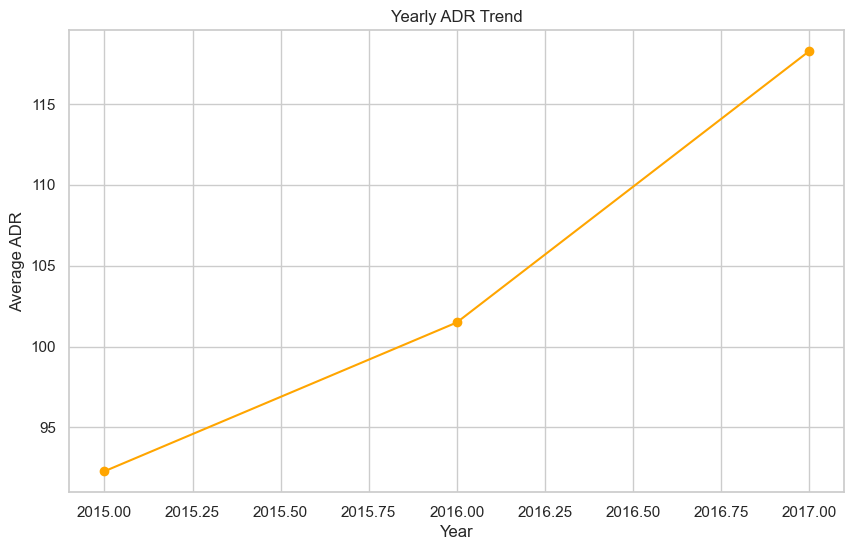

In [7]:
# Monthly bookings trend
monthly_bookings = df.groupby(df['arrival_date'].dt.to_period('M')).size()
monthly_bookings.plot(kind='line', marker='o')
plt.title('Monthly Booking Trend')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()

# Yearly ADR trend
yearly_adr = df.groupby('arrival_date_year')['adr'].mean()
yearly_adr.plot(kind='line', marker='o', color='orange')
plt.title('Yearly ADR Trend')
plt.xlabel('Year')
plt.ylabel('Average ADR')
plt.show()

## 7. Guest Demographics and Country Distribution

Visualize guest demographics such as group size and nationality, and plot the distribution of bookings by country.

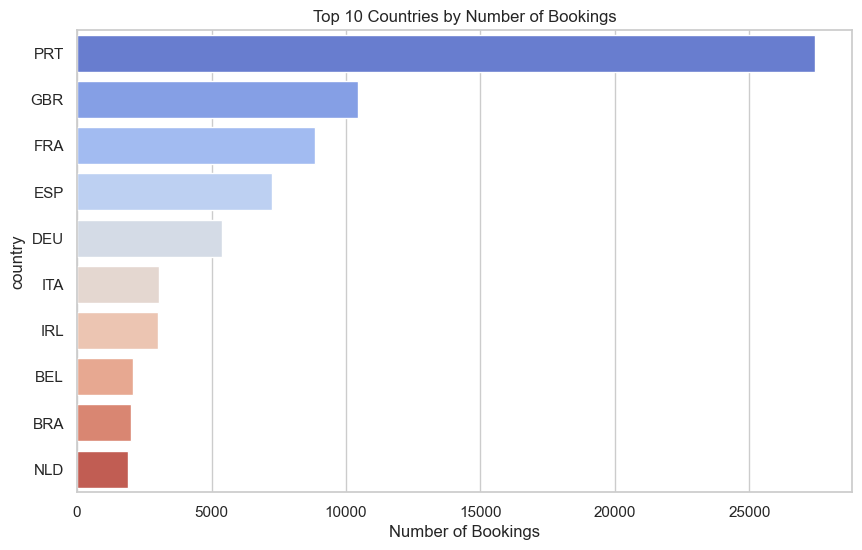

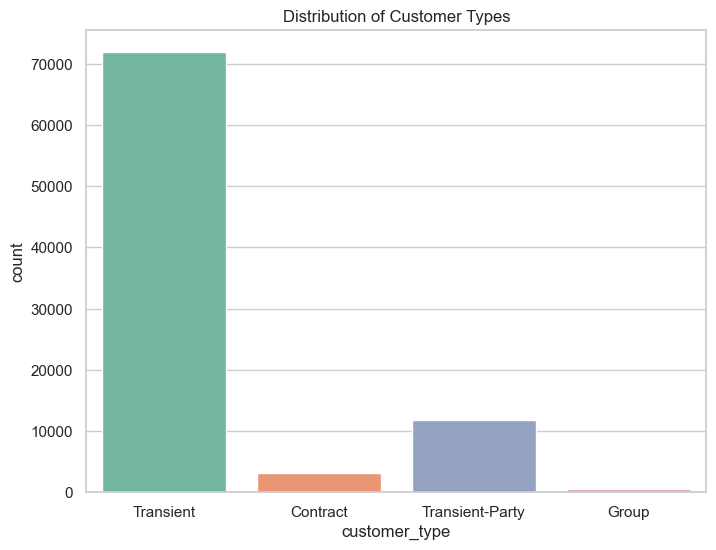

In [32]:
# Top 10 Guest Countries
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries by Number of Bookings')
plt.xlabel('Number of Bookings')
plt.show()

# Customer Types
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='customer_type', palette='Set2')
plt.title('Distribution of Customer Types')
plt.show()


## 8. Market Segment and ADR Comparison

Compare market segment shares and analyze ADR across different segments using barplots and boxplots.

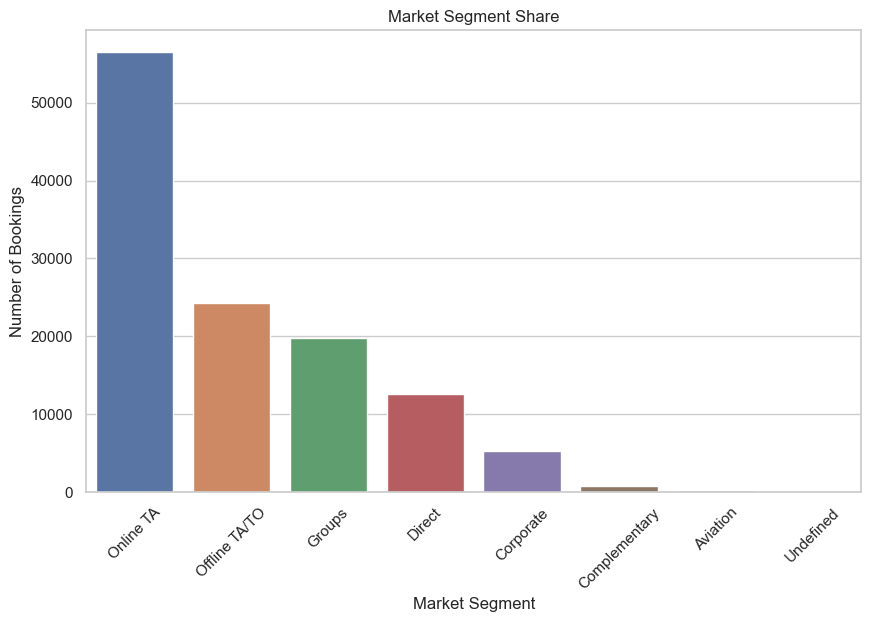

In [82]:
# Market segment share
segment_counts = df['market_segment'].value_counts()
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.title('Market Segment Share')
plt.ylabel('Number of Bookings')
plt.xlabel('Market Segment')
plt.xticks(rotation=45)
plt.show()


## 9. Booking Lead Time Analysis

Analyze lead time distribution across customer types and booking channels using violin plots and groupby statistics.

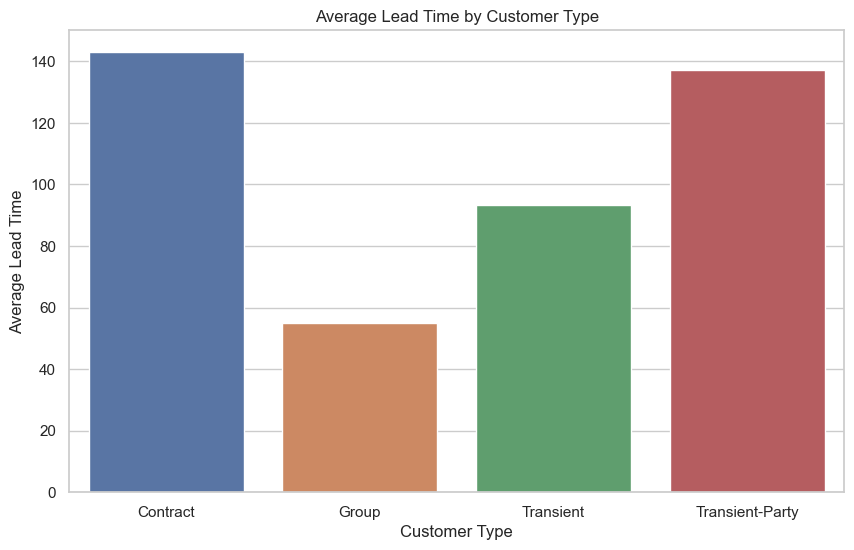

In [88]:
# Violin plot: Lead time by customer type
# Bar plot: Average lead time by customer type
avg_lead_time = df.groupby('customer_type')['lead_time'].mean().reset_index()
sns.barplot(x='customer_type', y='lead_time', data=avg_lead_time)
plt.title('Average Lead Time by Customer Type')
plt.ylabel('Average Lead Time')
plt.xlabel('Customer Type')
plt.show()


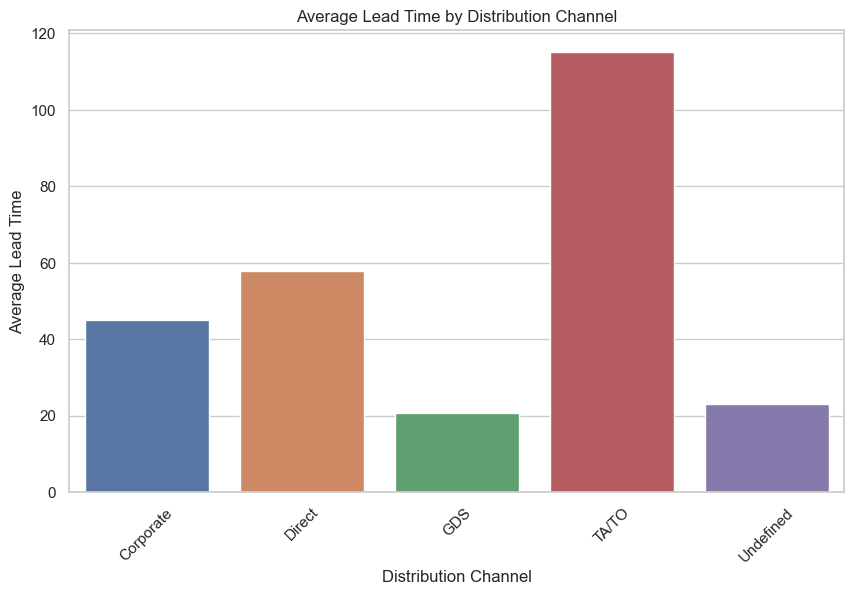

In [89]:
# Lead time by distribution channel
# Bar plot: Average lead time by distribution channel
avg_lead_time_channel = df.groupby('distribution_channel')['lead_time'].mean().reset_index()
sns.barplot(x='distribution_channel', y='lead_time', data=avg_lead_time_channel)
plt.title('Average Lead Time by Distribution Channel')
plt.ylabel('Average Lead Time')
plt.xlabel('Distribution Channel')
plt.xticks(rotation=45)
plt.show()


## 10. Correlation Analysis

Compute and visualize Pearson/Spearman correlation matrices for numeric features, and use heatmaps to detect multicollinearity.

### 📌 Step 1: Select Relevant Numerical Columns

In [38]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

### 🔍 Step 2: Pearson & Spearman Correlation Matrix

In [39]:
# Pearson Correlation
pearson_corr = numeric_df.corr(method='pearson')

# Spearman Correlation
spearman_corr = numeric_df.corr(method='spearman')


### 🔥 Step 3: Visualize with Heatmaps

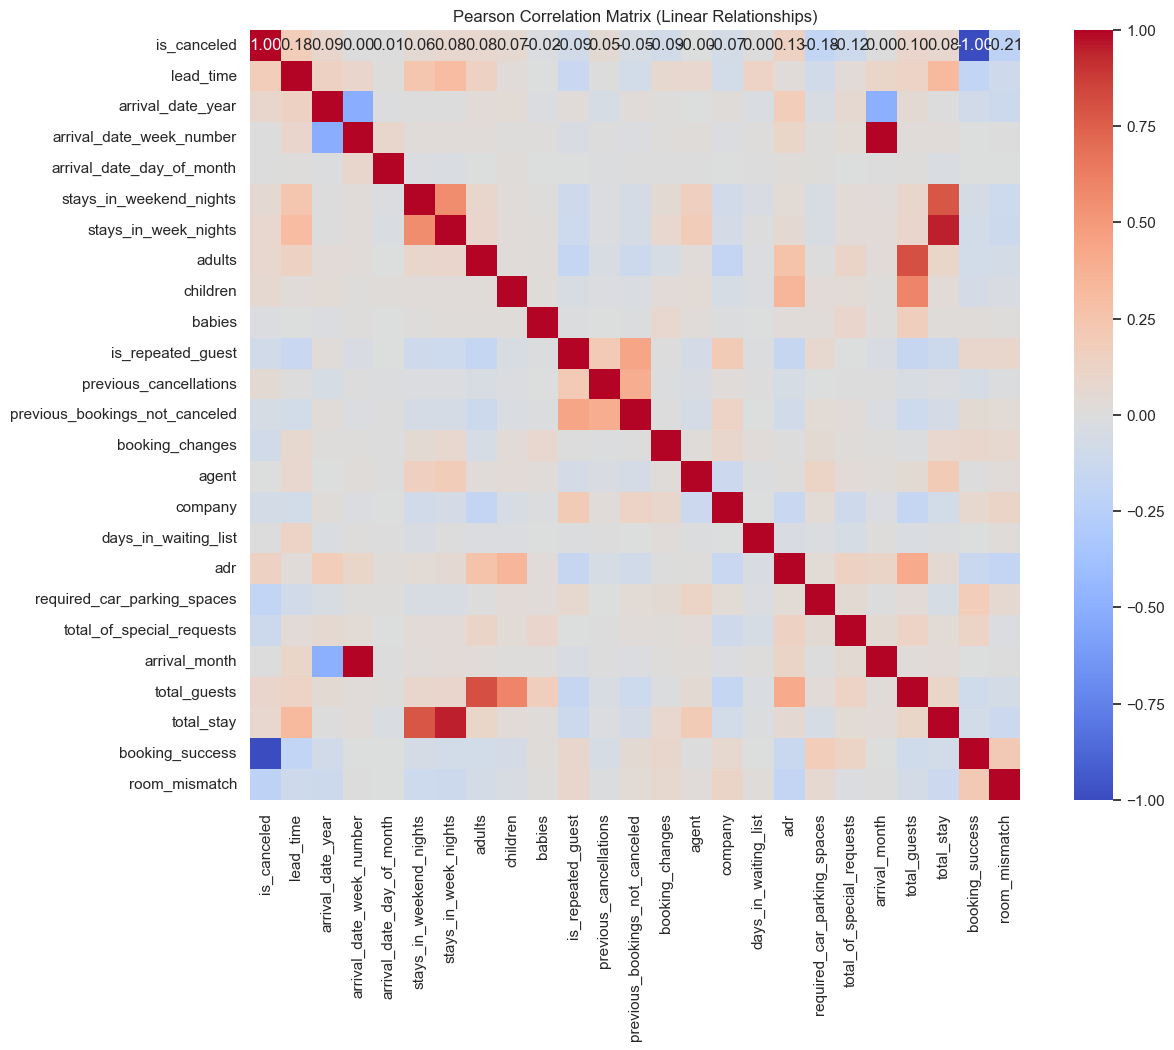

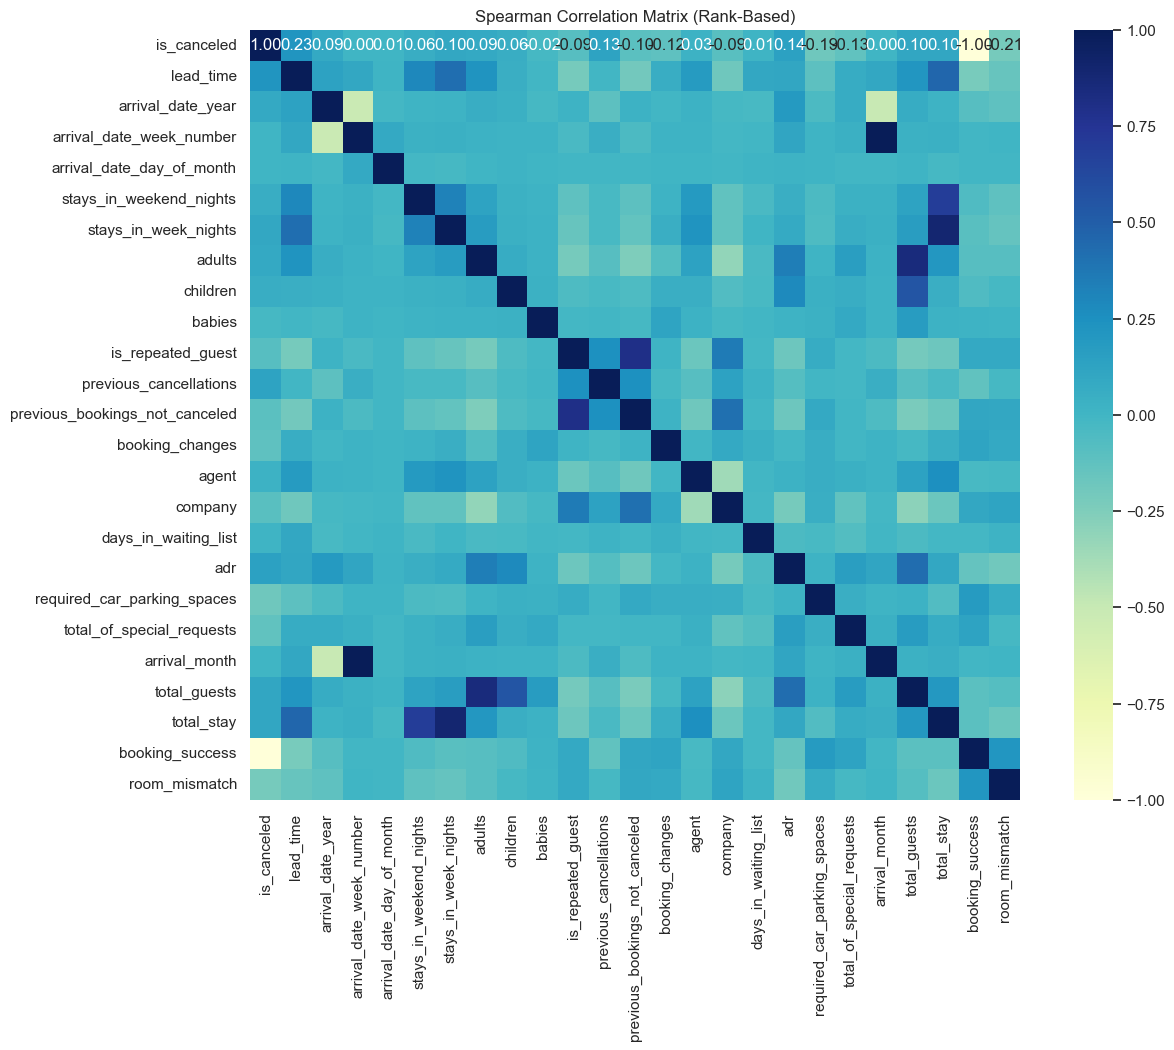

In [40]:
# Pearson Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pearson_corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Pearson Correlation Matrix (Linear Relationships)')
plt.show()

# Spearman Heatmap (for monotonic relationships)
plt.figure(figsize=(14, 10))
sns.heatmap(spearman_corr, annot=True, fmt='.2f', cmap='YlGnBu', square=True)
plt.title('Spearman Correlation Matrix (Rank-Based)')
plt.show()


### 📊 Step 4: Focused Analysis on ADR

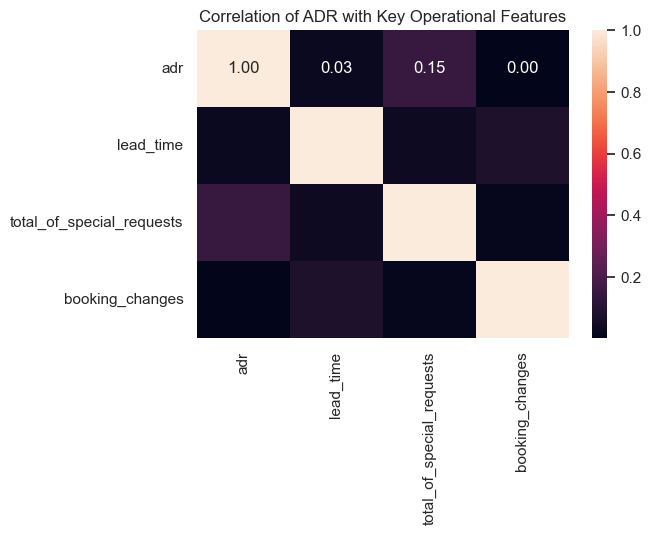

In [41]:
features_of_interest = ['adr', 'lead_time', 'total_of_special_requests', 'booking_changes']

# Subset correlation matrix
adr_corr_subset = numeric_df[features_of_interest].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(adr_corr_subset, annot=True, cmap='rocket', fmt=".2f")
plt.title('Correlation of ADR with Key Operational Features')
plt.show()

## 11. Hypothesis Testing

Perform statistical tests to validate business assumptions about ADR, room upgrades, and stay duration.

### ✅ Hypothesis 1
📌 H0: There is no difference in ADR between bookings made through Online TA and Direct channels<br>
📌 Test: Independent two-sample t-test (if normality can be assumed)

In [43]:
from scipy.stats import ttest_ind

# Filter groups
adr_online_ta = df[df['distribution_channel'] == 'TA/TO']['adr']
adr_direct = df[df['distribution_channel'] == 'Direct']['adr']

# Run t-test
t_stat, p_value = ttest_ind(adr_online_ta, adr_direct, equal_var=False)  # Welch’s t-test

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("❌ Reject H0: ADR is significantly different between Online TA and Direct channels.")
else:
    print("✅ Fail to reject H0: No significant difference in ADR between Online TA and Direct.")


T-Statistic: -1.1190482098643986
P-Value: 0.26313625284392583
✅ Fail to reject H0: No significant difference in ADR between Online TA and Direct.


### ✅ Hypothesis 2
📌 H0: Room upgrades are independent of lead time<br>
📌 Test: Chi-square test after converting lead time into categories (e.g., short, medium, long)

In [45]:
from scipy.stats import chi2_contingency

# Create a new column: Upgrade happened or not
df['room_upgraded'] = (df['assigned_room_type'] != df['reserved_room_type']).astype(int)

# Bin lead_time
df['lead_time_bin'] = pd.cut(df['lead_time'], bins=[-1, 30, 90, 365], labels=['Short', 'Medium', 'Long'])

# Contingency Table
contingency = pd.crosstab(df['lead_time_bin'], df['room_upgraded'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-Square Statistic:", chi2)
print("P-Value:", p)

if p < 0.05:
    print("❌ Reject H0: Room upgrades are associated with lead time.")
else:
    print("✅ Fail to reject H0: Room upgrades are independent of lead time.")


Chi-Square Statistic: 1637.1158371645754
P-Value: 0.0
❌ Reject H0: Room upgrades are associated with lead time.


### ✅ Hypothesis 3
📌 H0: Average stay duration does not differ between different customer types<br>
📌 Test: One-way ANOVA

In [47]:
from scipy.stats import f_oneway

# Create total stay duration
df['stay_duration'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

# Groups
grouped_stay = [group['stay_duration'].values for name, group in df.groupby('customer_type')]

# ANOVA test
f_stat, p_value = f_oneway(*grouped_stay)

print("F-Statistic:", f_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("❌ Reject H0: Stay duration significantly differs across customer types.")
else:
    print("✅ Fail to reject H0: No significant difference in stay duration across types.")


F-Statistic: 881.2836001413949
P-Value: 0.0
❌ Reject H0: Stay duration significantly differs across customer types.


## 12. Key Business Questions Exploration

Use groupby, pivot tables, and visualizations to answer business questions about ADR drivers, booking changes, room upgrades, guest demographics, and booking patterns.

In [54]:
# 1. What influences ADR the most?
corr_matrix = df.corr(numeric_only=True)
adr_corr = corr_matrix['adr'].sort_values(ascending=False)
print("Top correlations with ADR:\n", adr_corr)

Top correlations with ADR:
 adr                               1.000000
total_guests                      0.409737
children                          0.345730
adults                            0.263399
arrival_date_year                 0.186773
total_of_special_requests         0.146998
is_canceled                       0.133669
arrival_month                     0.110851
arrival_date_week_number          0.105228
total_stay                        0.058598
stay_duration                     0.058598
stays_in_week_nights              0.057470
stays_in_weekend_nights           0.042554
required_car_parking_spaces       0.041490
lead_time                         0.025710
babies                            0.024941
arrival_date_day_of_month         0.022774
agent                             0.009839
booking_changes                   0.001600
days_in_waiting_list             -0.034825
previous_cancellations           -0.053088
previous_bookings_not_canceled   -0.090629
booking_success           

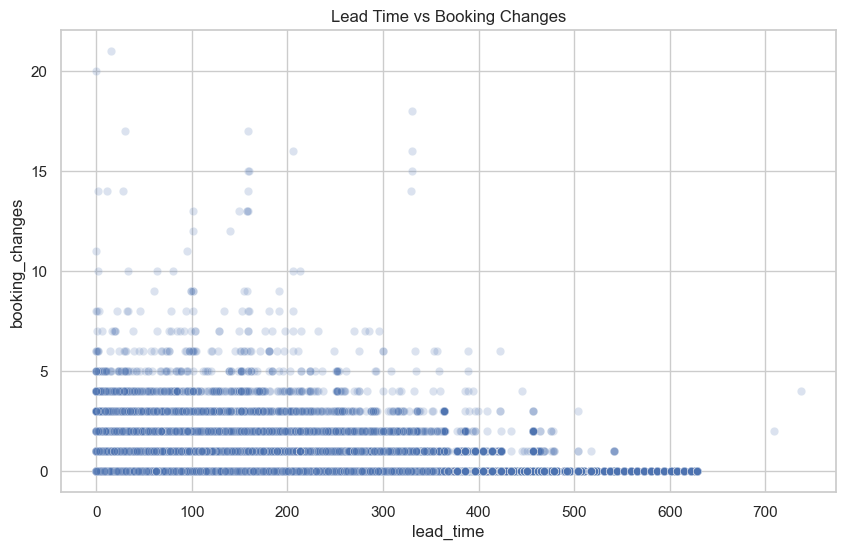

In [90]:
# 2. Do guests who book earlier tend to request more changes?
sns.scatterplot(x='lead_time', y='booking_changes', data=df, alpha=0.2)
plt.title('Lead Time vs Booking Changes')
plt.show()

In [56]:
# 3. Are there pricing or booking differences across countries?
top_countries_adr = df.groupby('country')['adr'].mean().sort_values(ascending=False).head(10)
print("Top 10 countries by average ADR:\n", top_countries_adr)

Top 10 countries by average ADR:
 country
DJI    273.000000
AIA    265.000000
AND    202.652857
UMI    200.000000
LAO    181.665000
MYT    177.750000
NCL    175.500000
GIB    169.082667
FRO    165.666667
COM    165.305000
Name: adr, dtype: float64


In [57]:

# 4. Is there a pattern in room upgrades or reassignment?
upgrade_rate = df['room_upgraded'].mean()
print(f"Upgrade rate: {upgrade_rate:.2%}")

Upgrade rate: 15.00%


In [58]:
# 5. Are reserved room types consistently matched with assigned room types?
room_match_rate = (df['reserved_room_type'].astype(str) == df['assigned_room_type'].astype(str)).mean()
print(f"Room match rate: {room_match_rate:.2%}")

Room match rate: 85.00%


In [59]:
# 6. What are the most common guest demographics (e.g., group size, nationality)?
print(df['total_guests'].value_counts().head())
print(df['country'].value_counts().head())

total_guests
2.0    57055
1.0    16071
3.0    10078
4.0     3870
0.0      166
Name: count, dtype: int64
country
PRT    27451
GBR    10433
FRA     8837
ESP     7252
DEU     5387
Name: count, dtype: int64


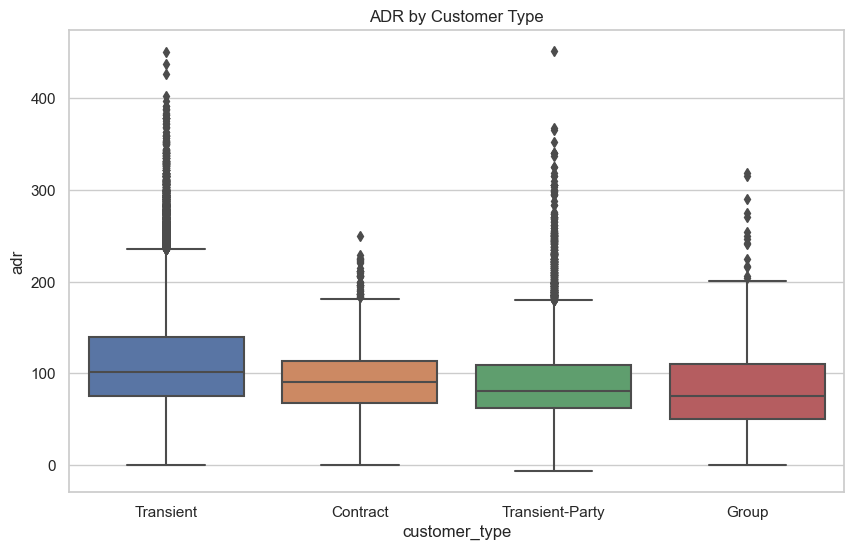

In [60]:
# 7. Are there patterns in guest types (e.g., transient vs. corporate) that influence booking behavior?
sns.boxplot(x='customer_type', y='adr', data=df)
plt.title('ADR by Customer Type')
plt.show()


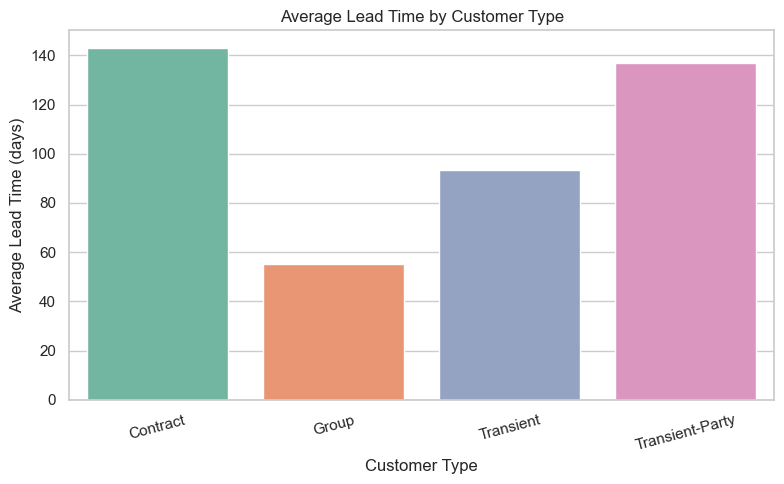

In [91]:
# 8. How does booking lead time vary across customer types and countries?
# Group by customer type and calculate mean lead time
lead_time_by_customer = df.groupby('customer_type')['lead_time'].mean().reset_index()

# Plot as bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='customer_type', y='lead_time', data=lead_time_by_customer, palette='Set2')
plt.title('Average Lead Time by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Lead Time (days)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


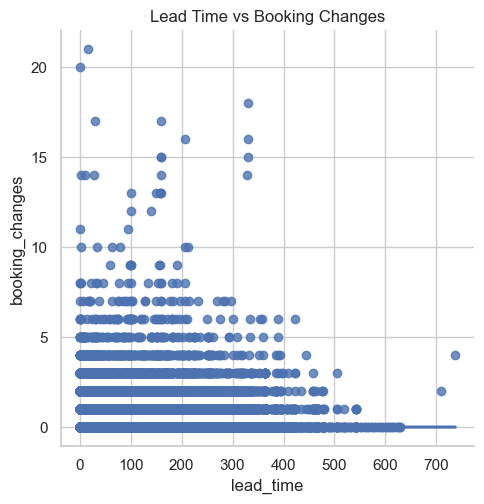

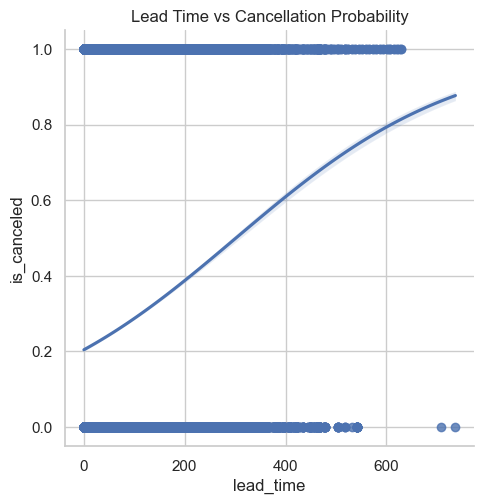

In [62]:
# 9. Are longer lead times associated with fewer booking changes or cancellations?
sns.lmplot(x='lead_time', y='booking_changes', data=df, lowess=True)
plt.title('Lead Time vs Booking Changes')
plt.show()
sns.lmplot(x='lead_time', y='is_canceled', data=df, logistic=True)
plt.title('Lead Time vs Cancellation Probability')
plt.show()

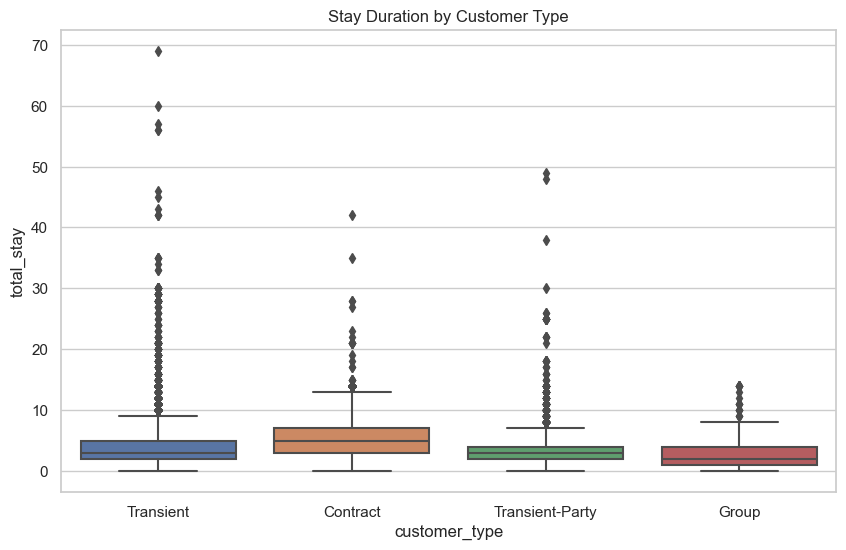

In [63]:
# 10. What is the typical duration of stay, and how does it vary by customer type or segment?
sns.boxplot(x='customer_type', y='total_stay', data=df)
plt.title('Stay Duration by Customer Type')
plt.show()


In [64]:
# 11. How often are guests upgraded or reassigned to a different room type?
print(f"Upgrade rate: {upgrade_rate:.2%}")

Upgrade rate: 15.00%


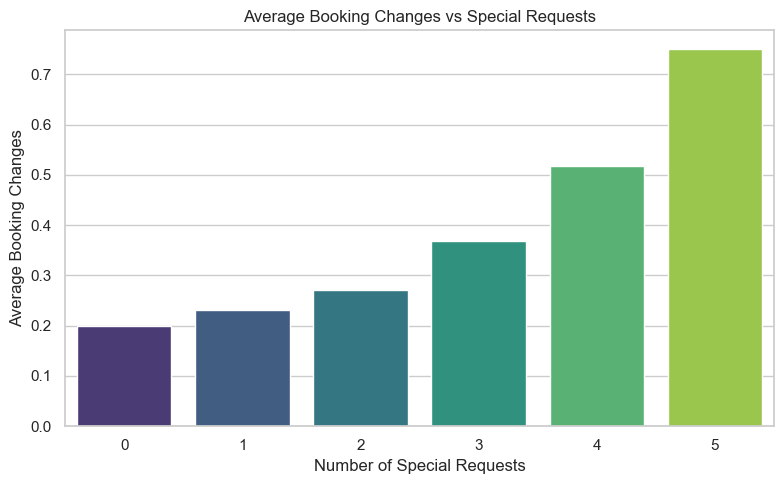

In [92]:
# 12. Are guests who make special requests more likely to experience booking changes or longer stays?
# Group by number of special requests and get average booking changes
avg_booking_changes = df.groupby('total_of_special_requests')['booking_changes'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='total_of_special_requests', y='booking_changes', data=avg_booking_changes, palette='viridis')
plt.title('Average Booking Changes vs Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Average Booking Changes')
plt.tight_layout()
plt.show()


In [66]:
# 13. Do certain market segments or distribution channels show higher booking consistency or revenue?
segment_adr = df.groupby('market_segment')['adr'].mean().sort_values(ascending=False)
print("ADR by Market Segment:\n", segment_adr)
channel_adr = df.groupby('distribution_channel')['adr'].mean().sort_values(ascending=False)
print("ADR by Distribution Channel:\n", channel_adr)

ADR by Market Segment:
 market_segment
Online TA        118.171606
Direct           116.579429
Aviation         100.170396
Offline TA/TO     81.350389
Groups            74.864284
Corporate         68.046794
Undefined         15.000000
Complementary      3.049245
Name: adr, dtype: float64
ADR by Distribution Channel:
 distribution_channel
GDS          120.317845
Direct       109.133604
TA/TO        108.476776
Corporate     68.429169
Undefined     46.240000
Name: adr, dtype: float64


In [67]:
# 14. What factors are most strongly associated with higher ADR?
print("Top correlations with ADR:\n", adr_corr)

Top correlations with ADR:
 adr                               1.000000
total_guests                      0.409737
children                          0.345730
adults                            0.263399
arrival_date_year                 0.186773
total_of_special_requests         0.146998
is_canceled                       0.133669
arrival_month                     0.110851
arrival_date_week_number          0.105228
total_stay                        0.058598
stay_duration                     0.058598
stays_in_week_nights              0.057470
stays_in_weekend_nights           0.042554
required_car_parking_spaces       0.041490
lead_time                         0.025710
babies                            0.024941
arrival_date_day_of_month         0.022774
agent                             0.009839
booking_changes                   0.001600
days_in_waiting_list             -0.034825
previous_cancellations           -0.053088
previous_bookings_not_canceled   -0.090629
booking_success           

In [68]:
# 15. Are there customer types or segments consistently contributing to higher revenue?
revenue_by_type = df.groupby('customer_type')['adr'].sum().sort_values(ascending=False)
print("Total revenue by customer type:\n", revenue_by_type)

Total revenue by customer type:
 customer_type
Transient          7921821.93
Transient-Party    1028165.38
Contract            291151.78
Group                45892.90
Name: adr, dtype: float64


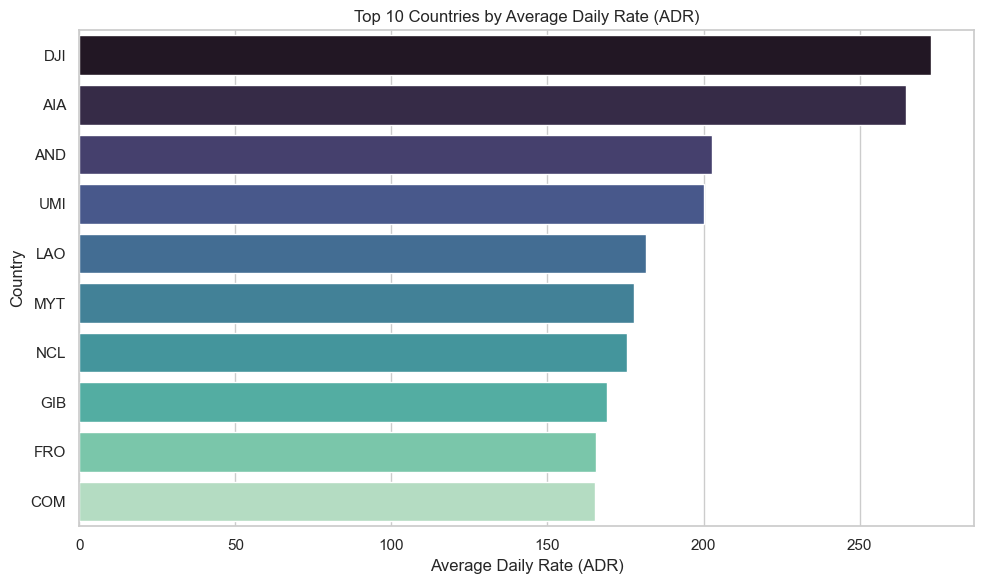

Top 10 countries by ADR:
 country
DJI    273.000000
AIA    265.000000
AND    202.652857
UMI    200.000000
LAO    181.665000
MYT    177.750000
NCL    175.500000
GEO    169.015909
COM    165.305000
FRO    155.200000
Name: adr, dtype: float64


In [93]:
# 16. Do bookings with more lead time or from specific countries yield higher ADR?
# Reset index to use in seaborn
country_adr = country_adr.reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='adr', y='country', data=country_adr, palette='mako')
plt.title('Top 10 Countries by Average Daily Rate (ADR)')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

country_adr = df.groupby('country')['adr'].mean().sort_values(ascending=False).head(10)
print("Top 10 countries by ADR:\n", country_adr)

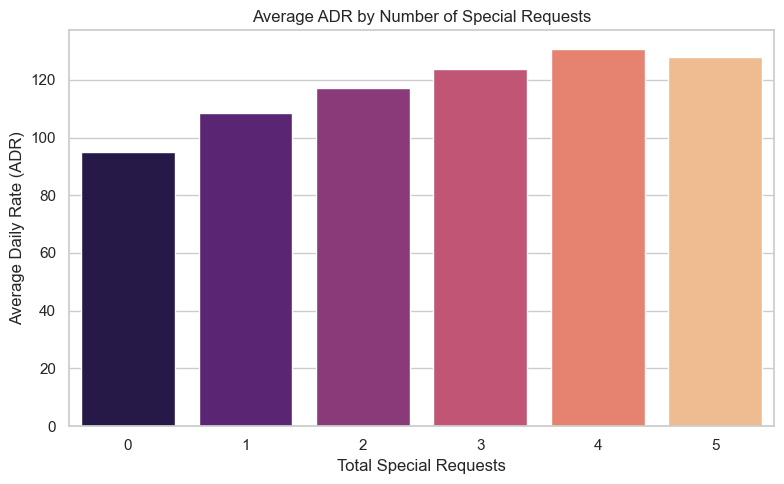

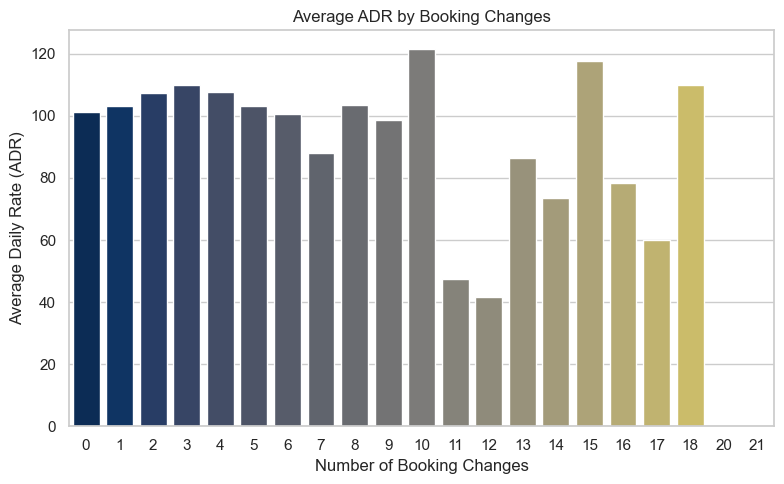

In [95]:
# 17. Are guests with higher ADR more likely to request special services or make booking modifications?
# Group by special requests and calculate average ADR
adr_by_requests = df.groupby('total_of_special_requests')['adr'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='total_of_special_requests', y='adr', data=adr_by_requests, palette='magma')
plt.title('Average ADR by Number of Special Requests')
plt.xlabel('Total Special Requests')
plt.ylabel('Average Daily Rate (ADR)')
plt.tight_layout()
plt.show()

# Group by booking changes and calculate average ADR
adr_by_changes = df.groupby('booking_changes')['adr'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='booking_changes', y='adr', data=adr_by_changes, palette='cividis')
plt.title('Average ADR by Booking Changes')
plt.xlabel('Number of Booking Changes')
plt.ylabel('Average Daily Rate (ADR)')
plt.tight_layout()
plt.show()



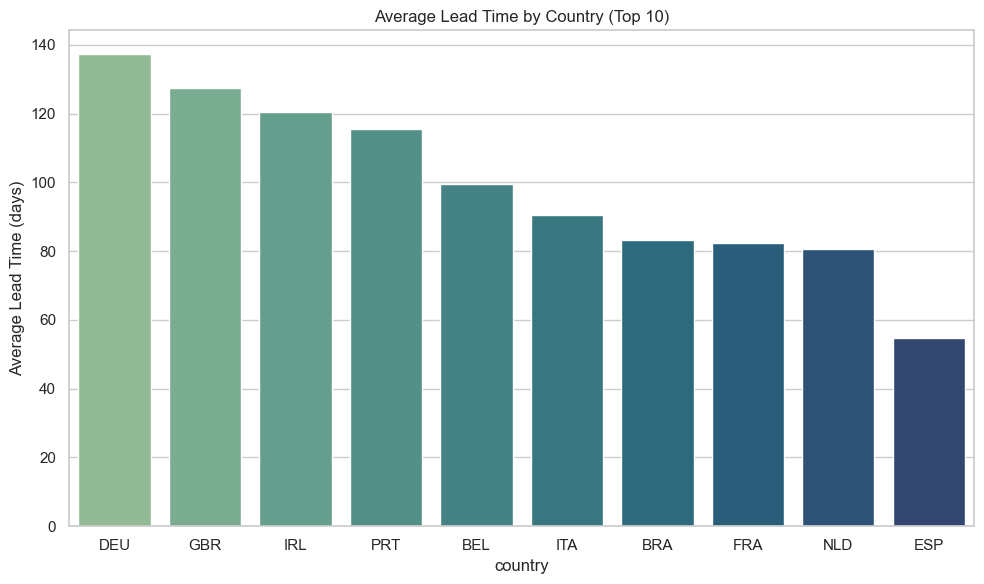

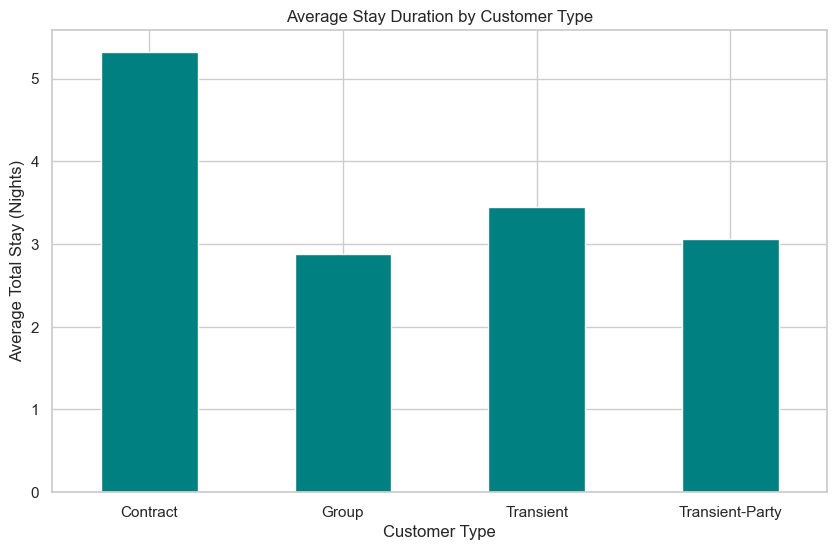

In [102]:
# 18. Do guests from different countries behave differently in terms of booking timing or stay length?
avg_lead_time = df[df['country'].isin(top_countries)].groupby('country')['lead_time'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='lead_time', data=avg_lead_time, palette='crest')
plt.title('Average Lead Time by Country (Top 10)')
plt.ylabel('Average Lead Time (days)')
plt.tight_layout()
plt.show()


df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df.groupby('customer_type')['total_stay'].mean().plot(
    kind='bar',
    color='teal'
)

plt.title('Average Stay Duration by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Total Stay (Nights)')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()


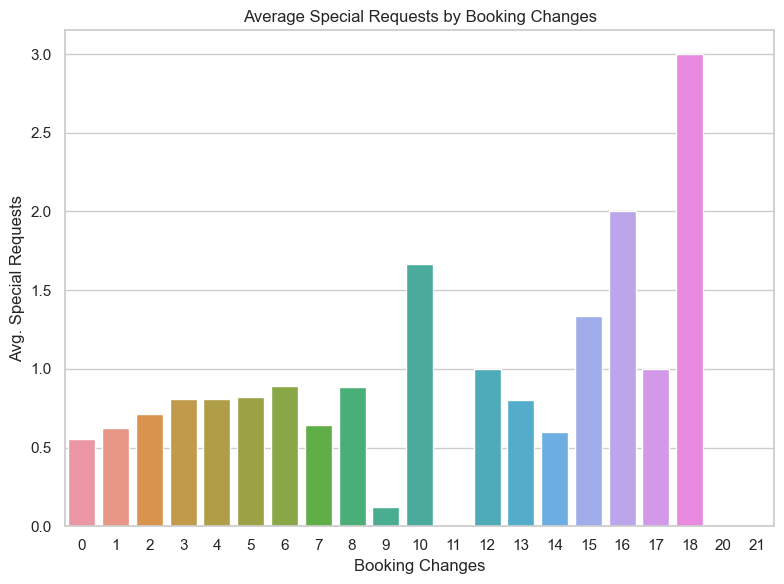

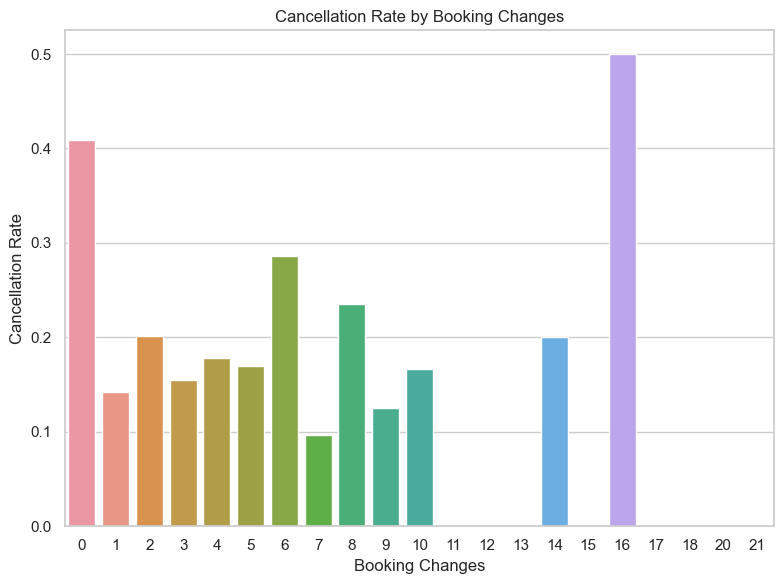

In [105]:
# 19. Are guests who make booking changes more likely to request additional services or cancel?
avg_requests = df.groupby('booking_changes')['total_of_special_requests'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='booking_changes', y='total_of_special_requests', data=avg_requests)
plt.title('Average Special Requests by Booking Changes')
plt.xlabel('Booking Changes')
plt.ylabel('Avg. Special Requests')
plt.tight_layout()
plt.show()


cancel_rate = df.groupby('booking_changes')['is_canceled'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='booking_changes', y='is_canceled', data=cancel_rate)
plt.title('Cancellation Rate by Booking Changes')
plt.xlabel('Booking Changes')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.show()
